<a href="https://colab.research.google.com/github/valroma/BootcampIGTI_ML_TP2/blob/main/ML_IGTI_Trabalho_Pratico_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho Prático - Módulo 3**

Neste trabalho, vamos exercitar conceitos sobre medidas de desempenho vistas em sala de aula a partir da modelagem de 3 problemas diferentes. Para o problema de regressão, usaremos a base diabetes_numeric.csv e uma regressão linear. Para o problema de classificação, usaremos a base bloodtransf.csv e um SVM. Para o problema de clusterização, vamos utilizar a base wine.csv e o algoritmo kmeans.






---
**Regressão - Diabetes**
---




In [7]:
#Importar as bibliotecas principais 
import pandas as pd #manipulação de dados
import numpy as np #utilização de vetores e matrizes (melhor para fazer contas matemáticas)
import matplotlib.pyplot as plt #plotar gráficos

In [8]:
# Importar os arquivos/dataset
df_diabetes = pd.read_csv('diabetes_numeric.csv')

In [9]:
#Ler o dataset
df_diabetes.head()

,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1
2,10.5,-0.9,5.2
3,10.6,-7.8,5.5
4,10.4,-29.0,5.0


In [10]:
#Tamanho do dataset
df_diabetes.shape

(43, 3)

Atributo = 3

In [11]:
# Analisando os dados estatísticos do dataset
df_diabetes.describe()

,age,deficit,c_peptide
count,43.000000,43.000000,43.000000
mean,9.032558,-8.148837,4.746512
std,4.022539,7.123080,0.720565
min,0.900000,-29.000000,3.000000
25%,5.500000,-12.700000,4.450000
50%,10.400000,-7.800000,4.900000
75%,11.850000,-2.000000,5.100000
max,15.600000,-0.200000,6.600000


Observações:
1 - Podemos perceber que não há dados faltantes no dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe05bbe7150>,
      dtype=object)

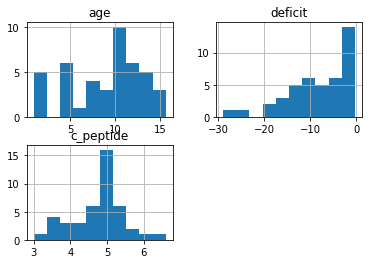

In [12]:
# Análise gráfica - Histograma
df_diabetes.hist()

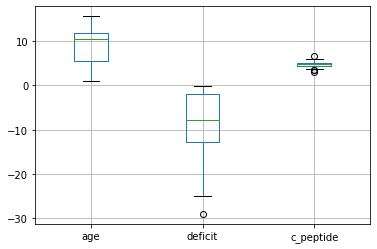

In [13]:
# Análise Gráfica - Boxplot
df_diabetes.boxplot()

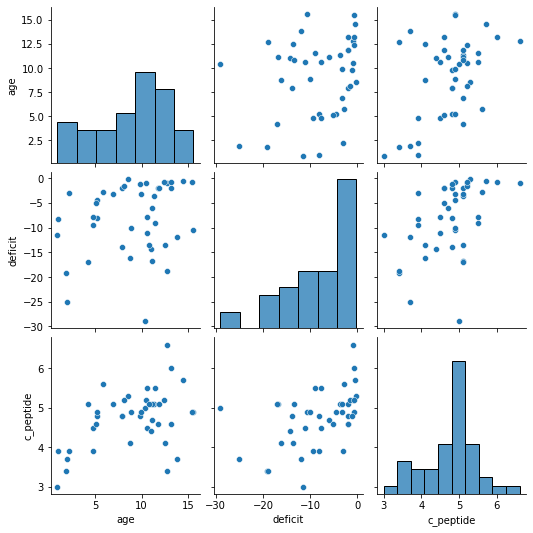

In [14]:
# Análise Pairplot
import seaborn as sns
sns.pairplot(df_diabetes)

In [15]:
# Correlação de Pearson
df_diabetes.corr('pearson')

,age,deficit,c_peptide
age,1.000000,0.232569,0.463827
deficit,0.232569,1.000000,0.488691
c_peptide,0.463827,0.488691,1.000000


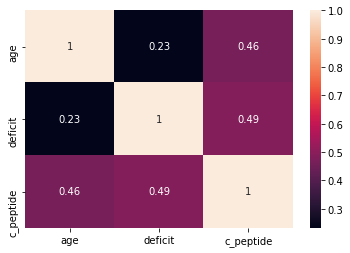

In [16]:
# Heatmap
sns.heatmap(df_diabetes.corr('pearson'),annot=True)

> 1 - Converter df em array 
>> Exemplo de array: lista_presença = ["João","Maria","Tina","Pedro"];

In [17]:
#Armazenar os textos em um array
diabetes = np.array(df_diabetes['c_peptide'])
#Transformar o nome das colunas em lista
feature_list = list(df_diabetes.columns)

In [18]:
#Remover a coluna de diabetes do df_diabetes original
df_diabetes = df_diabetes.drop('c_peptide', axis =1)
#Confirmar se foi removida a coluna c_peptide (item que queremos prever)
df_diabetes.columns

Index(['age', 'deficit'], dtype='object')

In [19]:
#Converter o df sem o c_peptide em array
age_deficit = np.array(df_diabetes)



> 2 - Iniciando a modelagem 





In [20]:
#Importar a biblioteca para separar o dataset entre treino e teste
from sklearn.model_selection import train_test_split

In [21]:
# Dividir o dataset entre treino e teste (Enunciado: test_size = 0,35 / random state = 54)
train_age_deficit, test_age_deficit, train_diabetes, test_diabetes = train_test_split(age_deficit,diabetes,
                                                                                      test_size = 0.35, 
                                                                                      random_state = 54
                                                                                      )

In [22]:
# Importar biblioteca de regressão linear
from sklearn.linear_model import LinearRegression

In [23]:
#Treinar o modelo no conjunto de dados de treino
diabetes_regr = LinearRegression().fit(train_age_deficit, train_diabetes)

In [24]:
#Aplicar o modelo treinado para prever se terá diabetes (em todo conjunto de teste)
pred_diabetes = diabetes_regr.predict(test_age_deficit)

#Exibir o df com o valores previstos
df_previsto = pd.DataFrame({'Real': test_diabetes, 'Previsto':pred_diabetes})
df_previsto.head(10)

,Real,Previsto
0,4.8,5.149704
1,5.1,4.535149
2,5.3,5.119985
3,3.7,4.904753
4,5.1,5.233693
5,3.9,4.634138
6,6.0,5.364907
7,5.1,4.663731
8,3.9,4.499411
9,4.9,5.495559


> 3 - Avaliar o modelo


In [25]:
# Avaliar as métricas
from sklearn import metrics

In [26]:
# Calcular métricas de erro da regressão linear
print ('R2:', metrics.r2_score(test_diabetes, pred_diabetes))
print ('MAE:', metrics.mean_absolute_error(test_diabetes, pred_diabetes))
print ('MSE:', metrics.mean_squared_error(test_diabetes, pred_diabetes))

R2: 0.2730761502482787
MAE: 0.5469803958260979
MSE: 0.40159703152494497


---
## **Classificação - Bloodtransf**





In [27]:
# Importar os arquivos/dataset
df_bt = pd.read_csv('bloodtransf.csv')

In [28]:
#Ler o dataset
df_bt.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [29]:
#Tamanho do dataset
df_bt.shape

(748, 5)

Instância = 748
Atributo = 5

In [30]:
# Analisando os dados estatísticos do dataset
df_bt.describe()

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


Observação:
1 - Podemos perceber que não há dados faltantes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0507c9d50>,
      dtype=object)

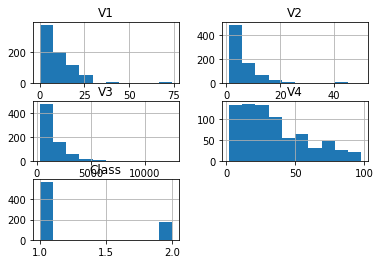

In [31]:
# Análise gráfica - Histograma
df_bt.hist()

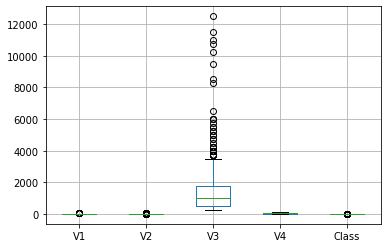

In [32]:
# Análise Gráfica - Boxplot
df_bt.boxplot()

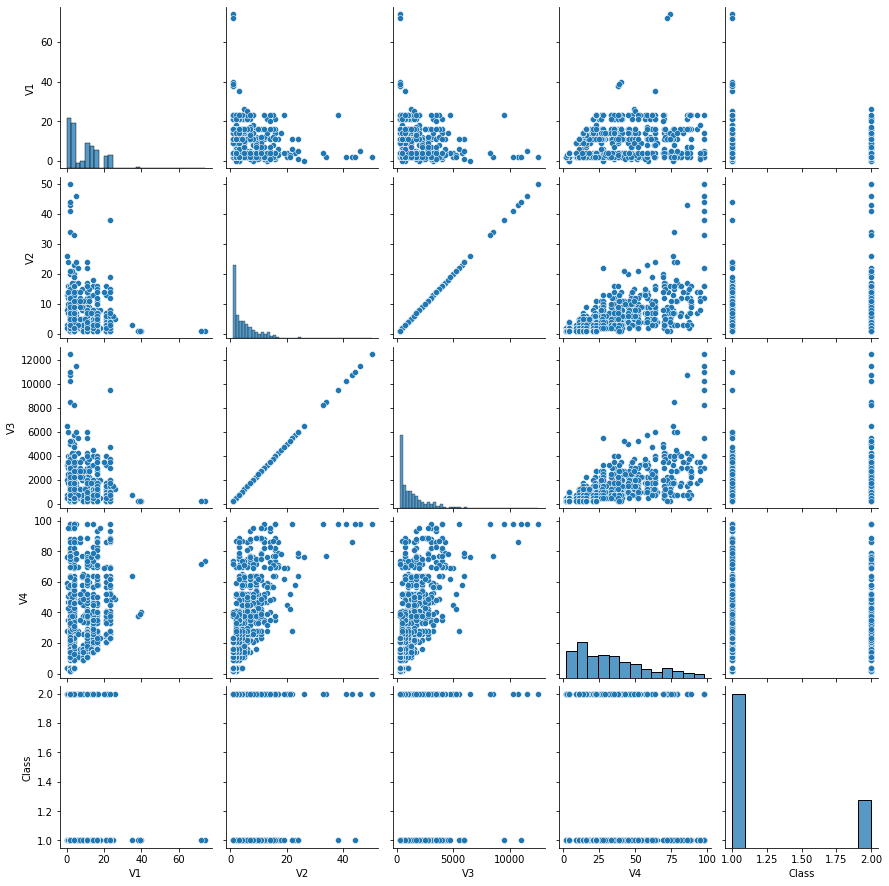

In [33]:
# Análise Pairplot
sns.pairplot(df_bt)

In [34]:
# Correlação de Pearson
df_bt.corr('pearson')

,V1,V2,V3,V4,Class
V1,1.000000,-0.182745,-0.182745,0.160618,-0.279869
V2,-0.182745,1.000000,1.000000,0.634940,0.218633
V3,-0.182745,1.000000,1.000000,0.634940,0.218633
V4,0.160618,0.634940,0.634940,1.000000,-0.035854
Class,-0.279869,0.218633,0.218633,-0.035854,1.000000


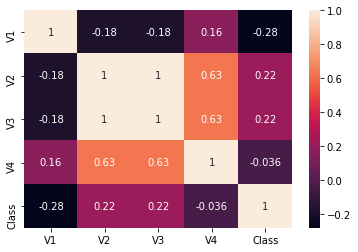

In [35]:
# Heatmap
sns.heatmap(df_bt.corr('pearson'),annot=True)

1 - Transformar a classe de 1 e 2 para 0 e 1 no df

In [36]:
# Criar um dicionário de dados para mapeamento
change_class = {
    1 : 0,
    2 : 1
}

#Substituir valores
df_bt['Class'] = df_bt['Class'].map(change_class)

# Verificar se a alteração foi feita
df_bt.head(10)

,V1,V2,V3,V4,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


2 - Converter em dummies

In [37]:
#Retirar o peso dos valores da classe (colocar novo mome do df)
#df_bt1 = pd.get_dummies(df_bt, columns= ['Class'])

# Visualizar
#df_bt1.head(10)

3 - Converter df em array  df original

In [38]:
#Armazenar os textos em um array
classe = np.array(df_bt['Class'])
#Transformar o nome das colunas em lista
feature_list = list(df_bt.columns)

In [39]:
#Remover a coluna de 'Class' do df_db original
df_bt = df_bt.drop('Class', axis =1)
#Confirmar se foi removida a coluna 'Class' (item que queremos prever)
df_bt.columns

Index(['V1', 'V2', 'V3', 'V4'], dtype='object')

In [40]:
#Converter o df sem o Class em array
Vs = np.array(df_bt)

4 - COnverter df em array df novo

In [41]:
#Armazenar os textos em um array
#classe1 = np.array(df_bt1['Class'])
#Transformar o nome das colunas em lista
#feature_list = list(df_bt1.columns)

4 - Iniciar a modelagem

In [42]:
# Dividir o dataset entre treino e teste (Enunciado: test_size = 0,35 / random state = 54)
train_Vs, test_Vs, train_classe, test_classe = train_test_split(Vs,classe,
                                                                test_size = 0.35,
                                                                random_state = 54)

In [43]:
# Importar a biblioteca do SVC
from sklearn.svm import SVC

# Definindo os hiperparâmetros
classifier = SVC(kernel='rbf')

# Treinando o SVC
classifier.fit(train_Vs, train_classe)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
#Aplicar o modelo treinado para prever a classe (em todo conjunto de teste)
pred_classe = classifier.predict(test_Vs)
 
#Exibir o df com o valores previstos
prev_classe = pd.DataFrame({'Real': test_classe, 'Previsto':pred_classe})
prev_classe.head(10)


,Real,Previsto
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [47]:
# Avaliando o modelo
print ('Acurácia', metrics.accuracy_score(test_classe, pred_classe))
print ('Precision', metrics.precision_score(test_classe, pred_classe))
print ('Recall', metrics.recall_score(test_classe, pred_classe))
print ('F1', metrics.f1_score(test_classe, pred_classe))
print ('AUROC', metrics.roc_auc_score(test_classe, pred_classe))

Acurácia 0.7595419847328244
Precision 0.0
Recall 0.0
F1 0.0
AUROC 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
print('Classification Report', metrics.classification_report(test_classe, pred_classe)) 

Classification Report               precision    recall  f1-score   support

           0       0.76      1.00      0.86       199
           1       0.00      0.00      0.00        63

    accuracy                           0.76       262
   macro avg       0.38      0.50      0.43       262
weighted avg       0.58      0.76      0.66       262



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---
## **Clusterização - Wine**





In [49]:
# Importar os arquivos/dataset
df_wine = pd.read_csv('wine.csv')

In [51]:
#Ler o dataset
df_wine.head(10)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [52]:
#Tamanho do dataset
df_wine.shape

(178, 14)

Instância = 178
Atributo = 14
Classe = 3

In [53]:
# Analisando os dados estatísticos do dataset
df_wine.describe()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [54]:
#Tamanho dataframe class = 1
df_cl = df_wine.groupby('class')
df_cl.count()


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
class,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59
2,71,71,71,71,71,71,71,71,71,71,71,71,71
3,48,48,48,48,48,48,48,48,48,48,48,48,48


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe04bad9810>,
      dtype=object)

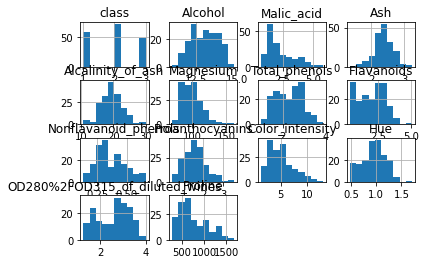

In [55]:
# Analise Grafica - Histograma
df_wine.hist()

In [56]:
# Análise Pairplot
#sns.pairplot(df_wine)

1 - Transformar a classe 1,2 e 3 em 0,1 e 2

In [57]:
#Criar um dicionario de dados para o mapeamento
name_to_class = {
    1: 0,
    2: 1,
    3: 2
}

# Substituir os valores
df_wine['class'] = df_wine['class'].map(name_to_class)

#check
df_wine.head(5)


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


2 - Converter df em array

In [58]:
#Armazenar os textos em um array
y_classe_wine = np.array(df_wine['class'])

#Transformar o nome das colunas em lista
feature_list = list(df_wine.columns)

#Remover a coluna de 'class' do df_wine original
df_wine = df_wine.drop('class', axis =1)

#Confirmar se foi removida a coluna 'class' (item que queremos prever)
df_wine.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280%2FOD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [59]:
#Converter o df sem o class em array
x_wine_s_class = np.array(df_wine)

3 - Iniciar a modelagem

In [60]:
# Dividir o dataset entre treino e teste (Enunciado: test_size = 0,35 / random state = 54)
train_x_wine_s_class, test_x_wine_s_class, train_y_classe_wine, test_y_classe_wine = train_test_split(x_wine_s_class,y_classe_wine,
                                                                test_size = 0.35,
                                                                random_state = 54)

In [61]:
# Importar o modelo de KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import cluster

In [62]:
# Quantidade ideal a de cluster
#wcss = []
#for i in range (1, 20):
#  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
#    kmeans.fit(df_wine)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1,20),wcss)
#plt.show()

In [63]:
#Definir hiperparâmetros
clustering = KMeans(n_clusters = 3, random_state = 54)
 
# Treinar o kmeans nos dados de treino
clustering.fit(train_x_wine_s_class,train_y_classe_wine);

In [64]:
#Aplicar o modelo treinado para prever a classe (em todo conjunto de teste)
y_pred_wine_classe = clustering.predict(test_x_wine_s_class)

#Exibir o df com o valores previstos
y_prev_wine_classe = pd.DataFrame({'Real': test_y_classe_wine, 'Previsto': y_pred_wine_classe})  
y_prev_wine_classe.head(10)

,Real,Previsto
0,0,1
1,0,2
2,1,0
3,2,0
4,1,0
5,0,1
6,1,1
7,1,0
8,2,2
9,2,2


In [71]:
# Importar biblioteca para calculo de métricas
from sklearn import metrics  

# Avaliando o modelo
print('Coeficiente de Silhueta:', metrics.silhouette_score(test_x_wine_s_class, y_pred_wine_classe)) #aqui tem que ser o test_data
print('Davies-Bouldin Score', metrics.davies_bouldin_score(test_x_wine_s_class, y_pred_wine_classe)) #aqui tem que ser o test_data
print('Matriz de Contingência', metrics.cluster.contingency_matrix(test_y_classe_wine, y_pred_wine_classe)) 
print('Mutual information', metrics.mutual_info_score(test_y_classe_wine, y_pred_wine_classe))  

Coeficiente de Silhueta: 0.5581747258825842
Davies-Bouldin Score 0.5316199338449925
Matriz de Contingência [[ 0 13  6]
 [17  1  5]
 [ 6  0 15]]
Mutual information 0.42739927199674965
